# <center><span style="font-family: 'Times New Roman';">Taylor series and such</span></center>
## Minh Lai Nguyen

### Taylor Series of $\frac{1}{1-x}$

It can be expressed as $\sum_{n = 0}^{\infty}x^{n}$

In [1]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt

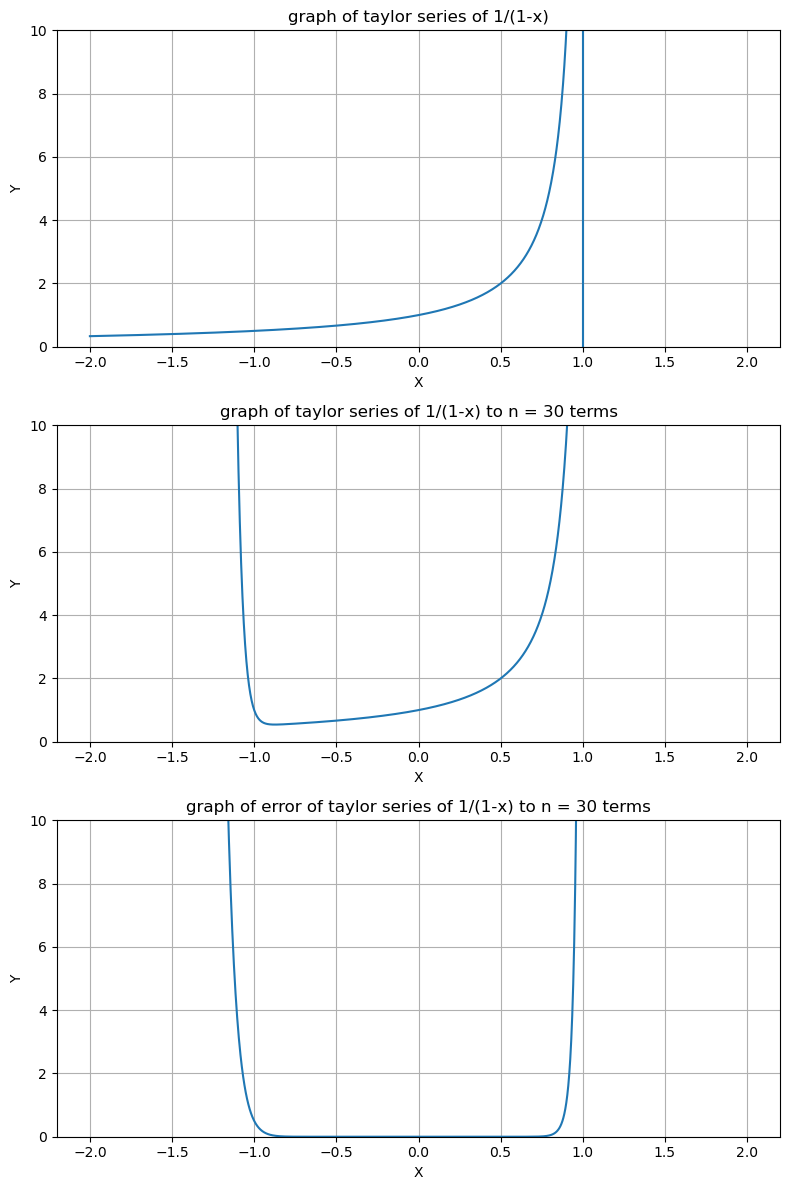

In [2]:
x = np.linspace(-2, 2, 2000)
def exact_func(x):
    '''
    this is the function of 1/(1-x)
    '''
    return 1/(1-x)



def taylor_func(x, n = 10):
    '''
    taylor series of 1/(1-x) first given an x input or array and spits out an array, specify how many terms by setting 
    n = ... by defult n is 10
    '''
    n_terms = n
    c = np.zeros(len(x))
    for i in range(n_terms + 1):
        c += x**i
    return c, n

n = 30

fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (8,12))
ax[0].plot(x, exact_func(x))
ax[0].set_ylim(0,10)
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X')
ax[0].set_title(f'graph of taylor series of 1/(1-x)')

ax[1].plot(x,taylor_func(x, n)[0])
ax[1].set_ylim(0,10)
ax[1].set_title(f'graph of taylor series of 1/(1-x) to n = {n} terms')
ax[1].set_ylabel('Y')
ax[1].set_xlabel('X')

ax[2].plot(x,abs(taylor_func(x, 20)[0] - exact_func(x)))
ax[2].set_ylim(0,10)
ax[2].set_title(f'graph of error of taylor series of 1/(1-x) to n = {n} terms')
ax[2].set_ylabel('Y')
ax[2].set_xlabel('X')

for a in ax:
    a.grid(True)
plt.tight_layout()


### Taylor Series of $e^{x}$

It can be expressed as $\sum_{n = 0}^{\infty}\frac{x^{n}}{n!}$

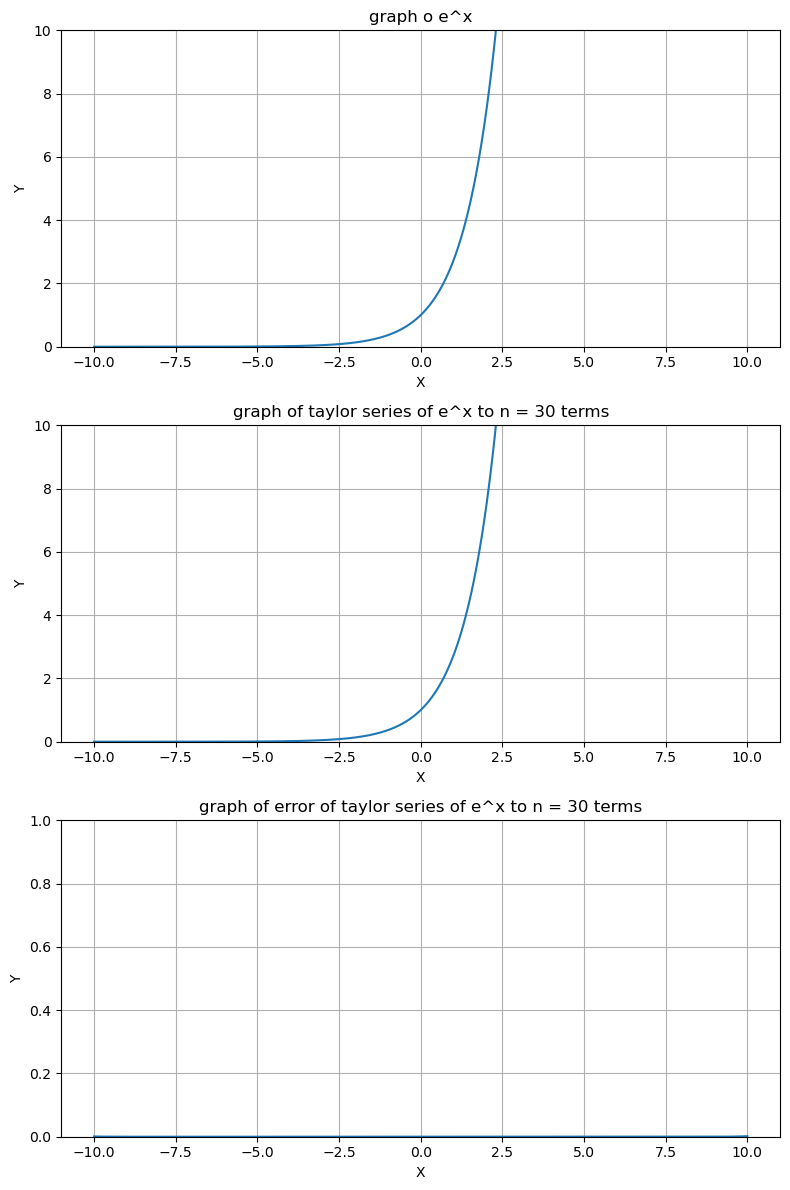

In [3]:
x = np.linspace(-10, 10, 2000)
def exact_func(x):
    '''
    this is the function of 1/(1-x)
    '''
    return np.exp(x)


def factorial(i):
    n = 1
    for num in range(round(i)):
        n = n*(num+1)
    return n
def taylor_func(x, n = 10):
    '''
    taylor series of e^x first given an x input or array and spits out an array, specify how many terms by setting 
    n = ... by defult n is 10
    '''
    n_terms = n
    c = np.zeros(len(x))
    for i in range(n_terms + 1):
        c = c + x**i/(factorial(i))
    return c

terms = 30
fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (8,12))
ax[0].plot(x, exact_func(x))
ax[0].set_ylim(0,10)
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X')
ax[0].set_title(f'graph o e^x')

ax[1].plot(x,taylor_func(x, n = terms))
ax[1].set_ylim(0,10)
ax[1].set_title(f'graph of taylor series of e^x to n = {terms} terms')
ax[1].set_ylabel('Y')
ax[1].set_xlabel('X')

ax[2].plot(x,abs(taylor_func(x, n = terms) - exact_func(x)))
ax[2].set_ylim(0,1)
ax[2].set_title(f'graph of error of taylor series of e^x to n = {terms} terms')
ax[2].set_ylabel('Y')
ax[2].set_xlabel('X')

for a in ax:
    a.grid(True)
plt.tight_layout()
plt.show()

## Let's try to make a general function for a Maclaurin series of any function that is continuous at x = 0

We will need symbolic imports to effectively take derivatives

credit to https://www.youtube.com/watch?v=DeeoiE22bZ8

In [4]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt


In [5]:
x, a, b, c = smp.symbols('x a b c', real = True)

Defining the function

In [12]:
#note this is a much less efficent method of calculating maclaurin series
def maclaurin(func, terms = 10):
    '''
    imput a function of x and get back a maclaurin series
    '''
    def factorial(i):
        n = 1
        for num in range(round(i)):
            n = n*(num+1)
        return n
    
    mac = 0
    x = smp.symbols('x', real = True)
    for n in range(terms + 1):
        dfdx = smp.diff(func, x, n)
        dfdx_func = dfdx.evalf(subs={x: 0})
        mac = mac + dfdx_func*x**n/factorial(n)
    return mac
func = smp.exp(-5*x)*smp.sin(x)

print(maclaurin(func, 20))
t1 = %timeit -n10 -r3 -o maclaurin(func)

4.18785843881808e-5*x**20 - 0.000130177621899733*x**19 + 0.000339226388209253*x**18 - 0.00063615396876757*x**17 + 0.000167034611479056*x**16 + 0.00562724391031269*x**15 - 0.0340067266654568*x**14 + 0.13766232738455*x**13 - 0.45026455026455*x**12 + 1.25217011383678*x**11 - 3.01168430335097*x**10 + 6.28575837742504*x**9 - 11.3333333333333*x**8 + 17.4650793650794*x**7 - 22.6111111111111*x**6 + 23.9666666666667*x**5 - 20.0*x**4 + 12.3333333333333*x**3 - 5.0*x**2 + 1.0*x
30.8 ms ± 4.57 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [14]:
def maclaurin(func, terms = 10):
    '''
    imput a function of x and get back a maclaurin series
    '''
    def factorial(i):
        n = 1
        for num in range(round(i)):
            n = n*(num+1)
        return n
    
    mac = 0
    fx = func
    x = smp.symbols('x', real = True)
    for n in range(terms + 1):
        dfdx_func = fx.evalf(subs={x: 0})
        mac = mac + dfdx_func*x**n/factorial(n)
        fx = smp.diff(fx, x)
    return mac
func = smp.exp(-5*x)*smp.sin(x)

print(maclaurin(func, 20))
t1 = %timeit -n10 -r3 -o maclaurin(func)

4.18785843881808e-5*x**20 - 0.000130177621899733*x**19 + 0.000339226388209253*x**18 - 0.00063615396876757*x**17 + 0.000167034611479056*x**16 + 0.00562724391031269*x**15 - 0.0340067266654568*x**14 + 0.13766232738455*x**13 - 0.45026455026455*x**12 + 1.25217011383678*x**11 - 3.01168430335097*x**10 + 6.28575837742504*x**9 - 11.3333333333333*x**8 + 17.4650793650794*x**7 - 22.6111111111111*x**6 + 23.9666666666667*x**5 - 20.0*x**4 + 12.3333333333333*x**3 - 5.0*x**2 + 1.0*x
5.57 ms ± 43.3 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)


find a function we can take a Maclaurin series of

In [8]:
x, a, b, c = smp.symbols('x a b c', real = True)

#defining the function with how many terms in the series
func = smp.exp(-6*x)*smp.sin(50*x)
terms = 200
exact_f = smp.lambdify((x), func, "numpy")
fx = maclaurin(func, terms)
f = smp.lambdify((x), fx, "numpy")

# domain of the function
t = np.linspace(0, 0.4, 1000)
y = f(t)
y_exact = exact_f(t)

### plotting the series vs the function

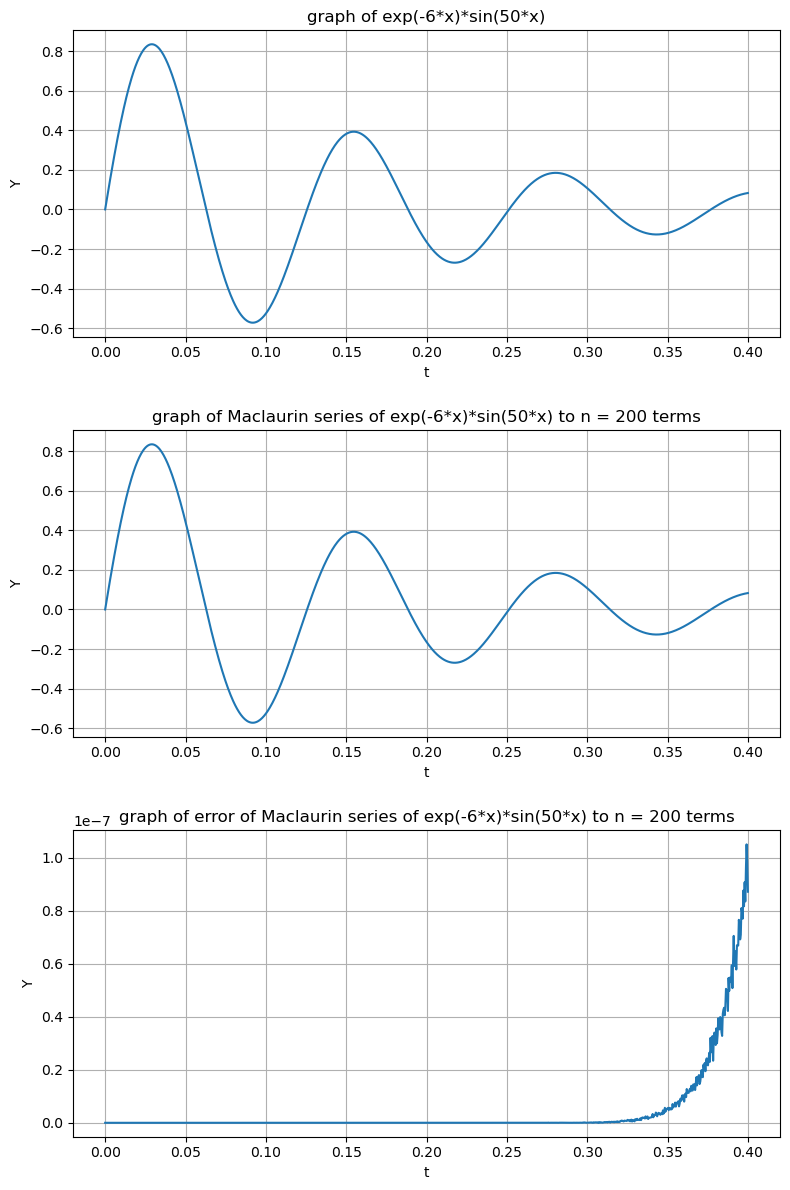

In [9]:
fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (8,12))
ax[0].plot(t,y_exact )
ax[0].set_ylabel('Y')
ax[0].set_xlabel('t')
ax[0].set_title(f'graph of {func}')

ax[1].plot(t,y)
ax[1].set_title(f'graph of Maclaurin series of {func} to n = {terms} terms')
ax[1].set_ylabel('Y')
ax[1].set_xlabel('t')

ax[2].plot(t,abs(y - y_exact))
ax[2].set_title(f'graph of error of Maclaurin series of {func} to n = {terms} terms')
ax[2].set_ylabel('Y')
ax[2].set_xlabel('t')

for a in ax:
    a.grid(True)
plt.tight_layout()
plt.show()

## Eventually Taylor Series...